# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the Dataset

In [2]:
df = pd.read_csv('Real estate.csv')

In [3]:
df

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

In [4]:
df.shape

(414, 8)

# EDA (Exploratory Data Analysis)

In [5]:
df.drop('No', axis = 1, inplace=True)

## 1) Manual

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [7]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

no missing data

In [8]:
df.describe()

X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971     17.712560   
std               0.281967     11.392485   
min            2012.667000      0.000000   
25%            2012.917000      9.025000   
50%            2013.167000     16.100000   
75%            2013.417000     28.150000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

Text(0.5, 1.0, 'Features Correlation Heatmap')

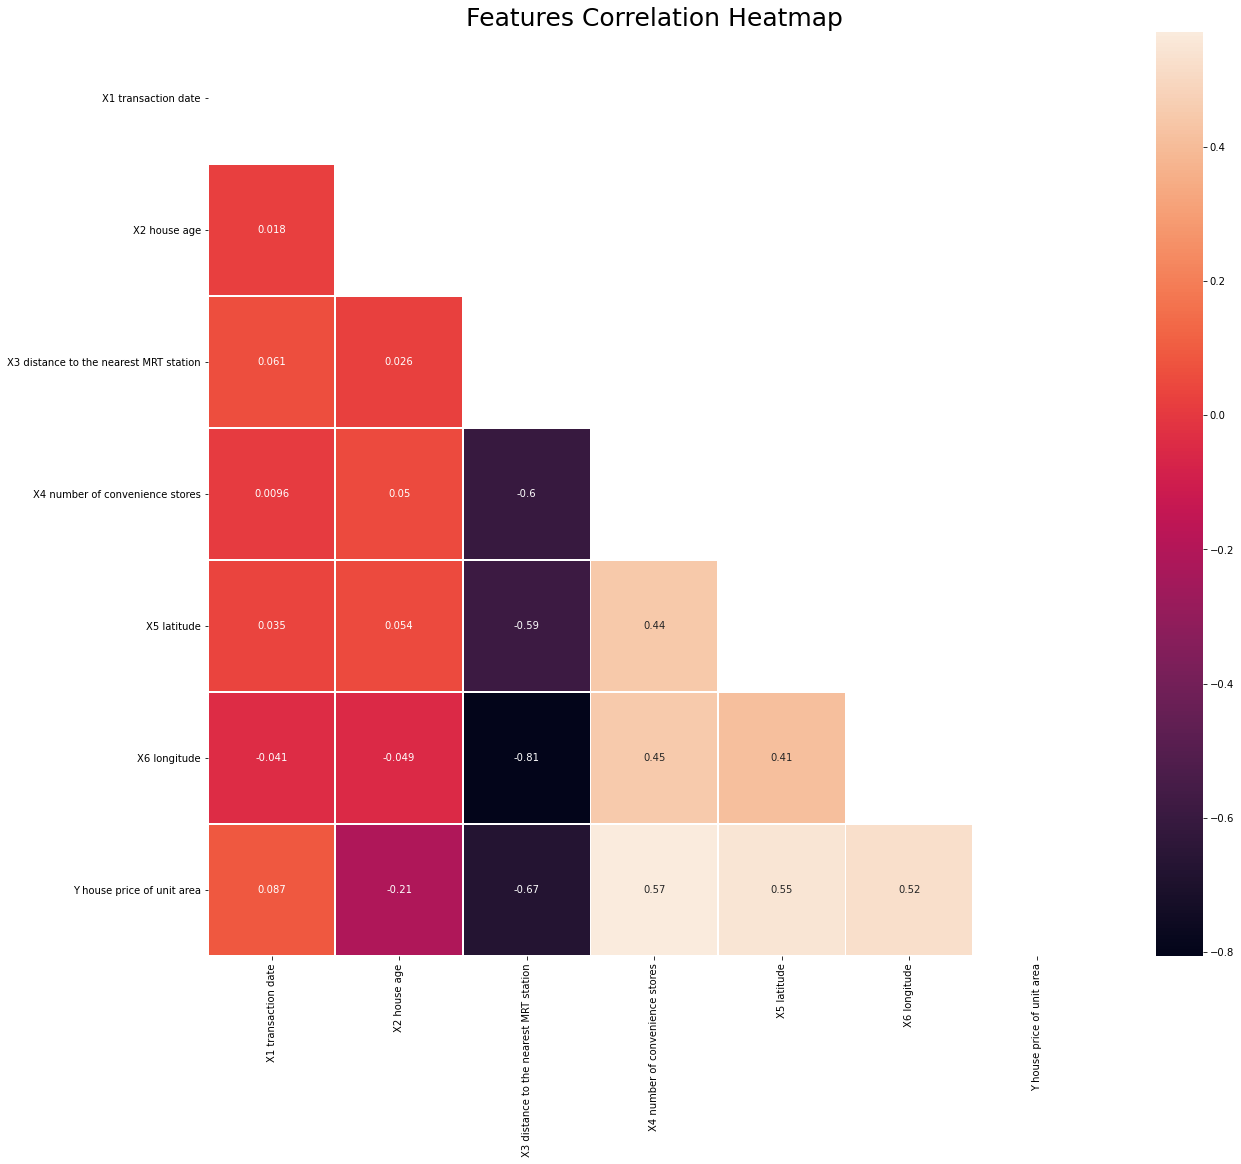

In [9]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=0.8, mask=matrix, cmap="rocket")
plt.title('Features Correlation Heatmap', fontsize = 25)

### some important plots

<AxesSubplot:xlabel='X6 longitude', ylabel='Count'>

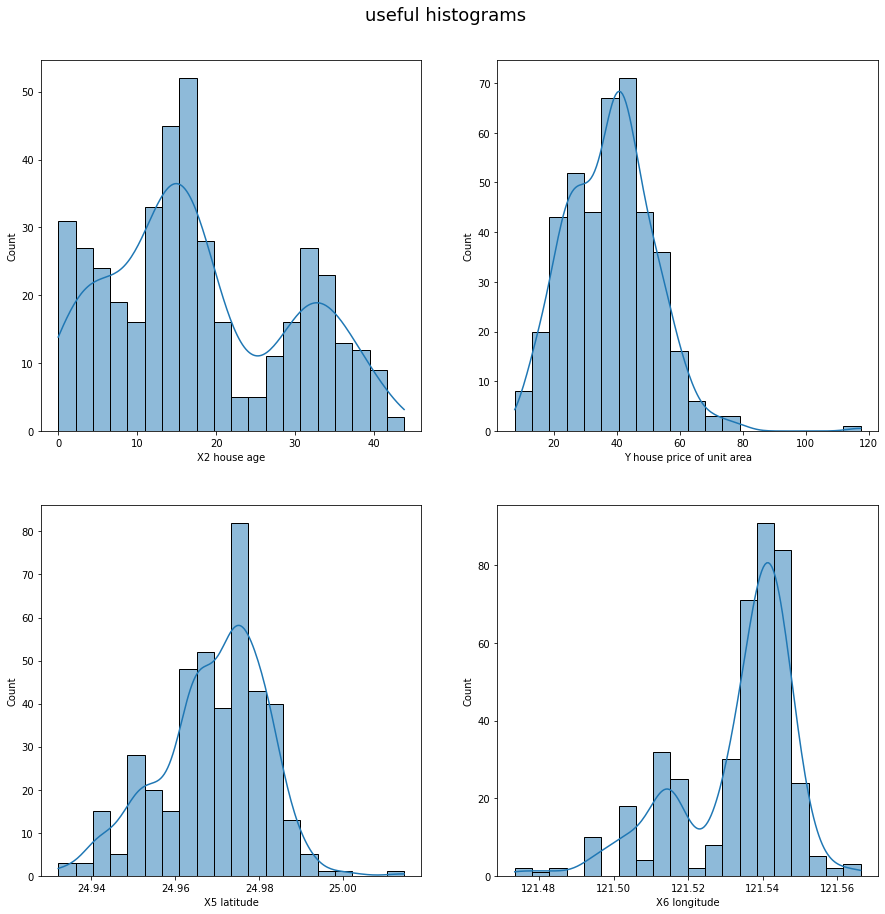

In [10]:
fig, axes = plt.subplots(2,2, figsize = (15,15))
fig.suptitle('useful histograms', fontsize = 18, y = 0.93)

sns.histplot(df['X2 house age'],ax = axes[0,0], kde = True, bins = 20)
sns.histplot(df['Y house price of unit area'],ax = axes[0,1], kde = True, bins = 20)
sns.histplot(df['X5 latitude'],ax = axes[1,0],  kde = True, bins = 20)
sns.histplot(df['X6 longitude'],ax = axes[1,1],  kde = True, bins = 20)

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X6 longitude'>

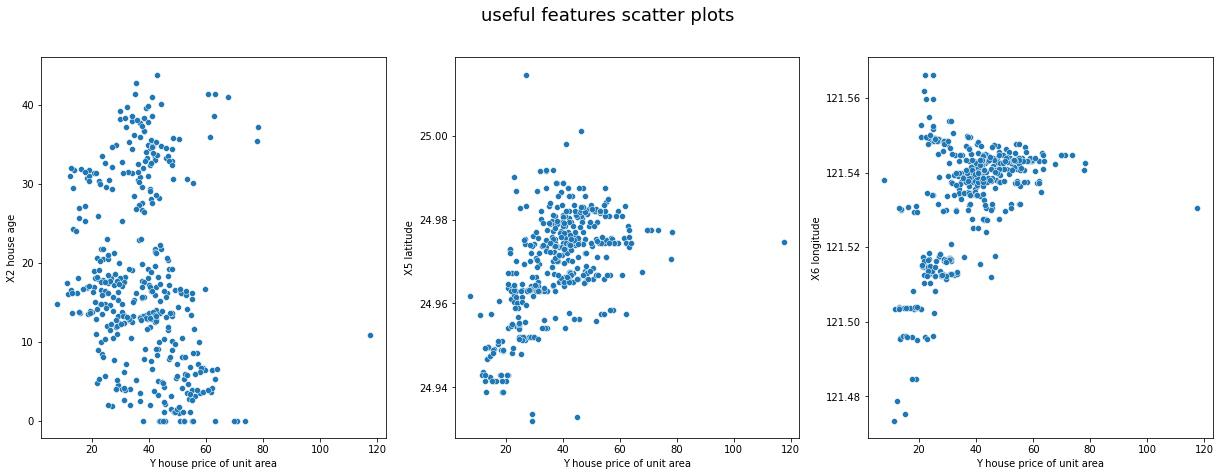

In [11]:
fig, axes = plt.subplots(1,3, figsize = (21,7))
fig.suptitle('useful features scatter plots', fontsize = 18)

sns.scatterplot(data = df, x = 'Y house price of unit area', y ='X2 house age', ax = axes[0])
sns.scatterplot(data = df, x = 'Y house price of unit area', y ='X5 latitude', ax = axes[1])
sns.scatterplot(data = df, x = 'Y house price of unit area', y ='X6 longitude', ax = axes[2])

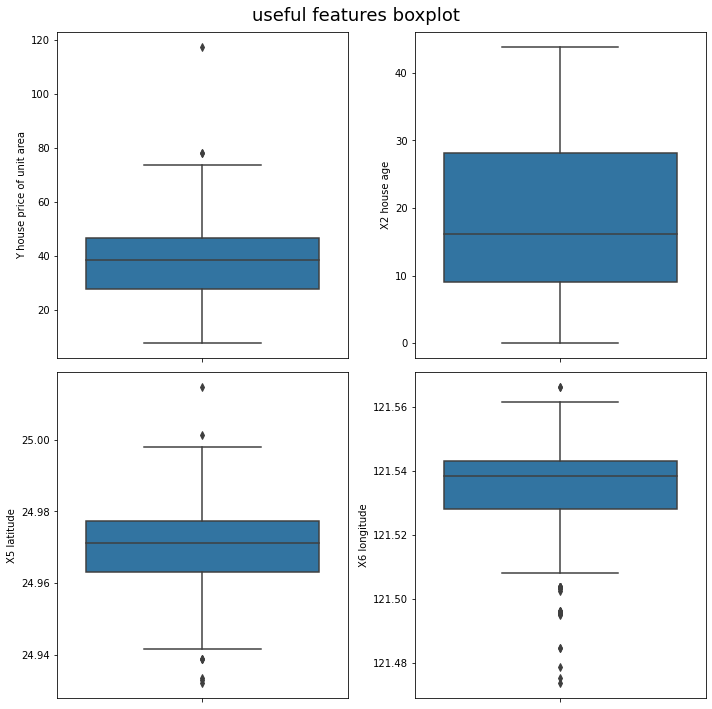

In [12]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
fig.suptitle('useful features boxplot', fontsize= 18)

sns.boxplot(data = df, y = 'Y house price of unit area', ax = axes[0,0])
sns.boxplot(data = df, y = 'X2 house age', ax = axes[0,1])
sns.boxplot(data = df, y = 'X5 latitude', ax = axes[1,0])
sns.boxplot(data = df, y = 'X6 longitude', ax = axes[1,1])

fig.tight_layout()

## 2) Pandas Profiling

In [13]:
import pandas_profiling as pp

In [14]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

In [15]:
X = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']

In [16]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree = 2, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [17]:
poly_features.shape

(414, 27)

In [18]:
# split data to test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [19]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

## 1) RidgCV

In [20]:
# ridgcv model
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1, 10), scoring = 'neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [21]:
ridge_cv_model.alpha_

10.0

In [22]:
y_pred_ridge = ridge_cv_model.predict(X_test)

In [23]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

print("MAE_ridge : ", MAE_ridge)
print("MSE_ridge : ", MSE_ridge)
print("RMSE_ridge : ", RMSE_ridge)
print("Mean : ", y.mean())

MAE_ridge :  4.391899767698311
MSE_ridge :  29.762841461841624
RMSE_ridge :  5.455533105191611
Mean :  37.98019323671498


## 2) LassoCV

In [24]:
# lassocv model
from sklearn.linear_model import LassoCV

lasso_model_cv = LassoCV(eps = 0.01, n_alphas = 100, cv = 5, max_iter=10000)
lasso_model_cv.fit(X_train,y_train)

LassoCV(cv=5, eps=0.01, max_iter=10000)

In [25]:
lasso_model_cv.alpha_

0.1139338217191917

In [26]:
y_pred_lasso = lasso_model_cv.predict(X_test)

In [27]:
# model evaluation

MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)

print("MAE_lasso : ", MAE_lasso)
print("MSE_lasso : ", MSE_lasso)
print("RMSE_lasso : ", RMSE_lasso)
print("Mean : ", y.mean())

MAE_lasso :  4.456685195298733
MSE_lasso :  30.76925877860368
RMSE_lasso :  5.547004486982472
Mean :  37.98019323671498


In [28]:
lasso_model_cv.coef_

array([ 0.        , -2.44467543, -0.        ,  3.12842499,  0.        ,
       -0.        ,  0.46822828, -0.        , -1.25119062,  0.39860448,
        3.74157112,  0.        ,  6.27486765,  0.        ,  0.23444532,
       -6.85967536, -0.        ,  3.83358115, -2.41550736, -6.07952925,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ])

## 3) ElasticNetCV

In [29]:
# elasticnetcv model
from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], cv = 5, max_iter=100000)
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000)

In [30]:
elastic_model.l1_ratio_

0.5

In [31]:
y_pred_elastic = elastic_model.predict(X_test)

In [32]:
# model evaluation

MAE_elas = mean_absolute_error(y_test, y_pred_elastic)
MSE_elas = mean_squared_error(y_test, y_pred_elastic)
RMSE_elas = np.sqrt(MSE_elas)

print("MAE_elas : ", MAE_elas)
print("MSE_elas : ", MSE_elas)
print("RMSE_elas : ", RMSE_elas)
print("Mean : ", y.mean())

MAE_elas :  4.376536760524018
MSE_elas :  29.7733434988798
RMSE_elas :  5.456495532746252
Mean :  37.98019323671498


# Conclusion

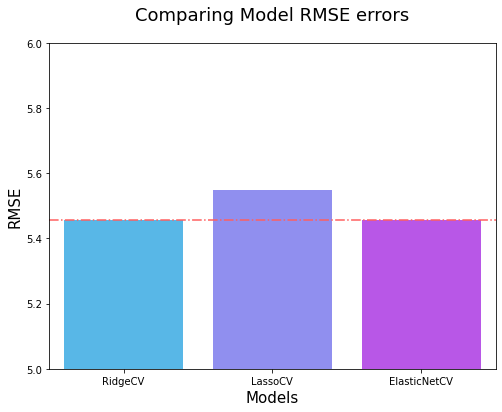

In [33]:
plt.figure(figsize=(8,6))

model_names = ['RidgeCV', 'LassoCV', 'ElasticNetCV']
model_errors = [RMSE_ridge, RMSE_lasso, RMSE_elas]

# plot
sns.barplot(x = model_names, y = model_errors, palette='cool')

# titles and styling
plt.xlabel('Models', fontsize = 15)
plt.ylabel('RMSE', fontsize = 15)
plt.title('Comparing Model RMSE errors', fontsize = 18, y=1.05)
plt.ylim(5,6)
plt.axhline(RMSE_ridge, color = '#ff5e5e', ls = '-.')

In [34]:
pd.DataFrame(model_errors, index=model_names, columns = ['Model Errors'])

Model Errors
RidgeCV           5.455533
LassoCV           5.547004
ElasticNetCV      5.456496

in this example ridge regression is the best and lasso regression is the worst model.